<a href="https://colab.research.google.com/github/febiinnnn/febiinn_51B37A36069276AB335490533D5F468F-smartinternz.com/blob/main/Plantdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
!pip install tensorflow keras numpy matplotlib


In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and loading
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'PlantVillage/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # FIXED: Use categorical for 15 classes
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    'PlantVillage/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # FIXED: Use categorical for 15 classes
    subset='validation'
)

# Get the number of classes
num_classes = len(train_generator.class_indices)
print(f"Detected {num_classes} classes.")

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # FIXED: Output matches num_classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # FIXED: Correct loss for multi-class
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 2500 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Detected 2 classes.
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.7443 - loss: 2.6547 - val_accuracy: 0.9631 - val_loss: 0.1175
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9793 - loss: 0.0675 - val_accuracy: 0.9856 - val_loss: 0.0358
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9831 - loss: 0.0512 - val_accuracy: 0.9952 - val_loss: 0.0158
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9944 - loss: 0.0216 - val_accuracy: 0.9920 - val_loss: 0.0251
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9985 - loss: 0.0134 - val_accuracy: 0.9968 - val_loss: 0.0088
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9868 - loss: 0.0400 - val_accuracy: 0.9952 - val_loss: 0.0172
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.9993 - loss: 0.0112 - val_accuracy: 0.9920 - val_loss: 0.0201
Epoch 

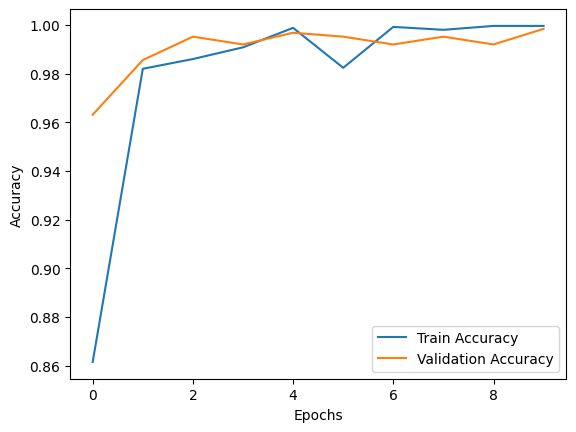

In [144]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [145]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9997 - loss: 0.0046
Validation Accuracy: 1.00


In [146]:
model.save("plant_disease_model.h5")


In [149]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "leaf1.jpg"  # Replace with actual image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)

import numpy as np

# Get the class labels from the train generator
class_labels = list(train_generator.class_indices.keys())

# Get the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the class name
print("Prediction:", class_labels[predicted_class])

# Check if the plant is healthy or diseased
if "healthy" in class_labels[predicted_class].lower():
    print("✅ The plant is healthy.")
else:
    print("🚨 The plant has a disease.")



Prediction: Pepper__bell___Bacterial_spot
🚨 The plant has a disease.


In [150]:
!pip install streamlit tensorflow pillow numpy pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [151]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load trained model
model = load_model("plant_disease_model.h5")  # Make sure this file is in Colab

# Define class labels based on your dataset
class_labels = ['Healthy', 'Bacterial_spot', 'Late_blight', 'Leaf_mold', 'Powdery_mildew']  # Modify as needed

st.title("🌿 Plant Disease Detection")
st.write("Upload an image of a plant leaf to check if it's healthy or diseased.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(150, 150))  # Resize image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    st.image(img, caption="Uploaded Image", use_column_width=True)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_name = class_labels[predicted_class]

    st.subheader(f"Prediction: {class_name}")
    if "healthy" in class_name.lower():
        st.success("✅ The plant is healthy.")
    else:
        st.error("🚨 The plant has a disease!")


Writing app.py


In [153]:
!pip install gradio
import gradio as gr

def predict_plant_disease(image):
    # Your model prediction logic here
    return "Healthy"  # Example output

iface = gr.Interface(fn=predict_plant_disease, inputs="image", outputs="text")
iface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c791d33946fe3710a9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces

In [156]:
model.save('model.h5')


In [157]:
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>